## Trabalho Deep Learning

- **Nome:** Felipe Coelho Silva

Implementação de um modelo de regularização regressão linear.


### Labels

In [41]:
# Import the relevant modules to be used later
from __future__ import print_function
import gzip
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import shutil
import struct
import sys




from time import time


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
%matplotlib inline



import pandas as pd

### Leitura dos Dados

In [42]:
def loadData(name, cimg):
    try:
        with gzip.open(name) as gz:
            n = struct.unpack('I', gz.read(4))
            # Read magic number.
            if n[0] != 0x3080000:
                raise Exception('Invalid file: unexpected magic number.')
            # Read number of entries.
            n = struct.unpack('>I', gz.read(4))[0]
            if n != cimg:
                raise Exception('Invalid file: expected {0} entries.'.format(cimg))
            crow = struct.unpack('>I', gz.read(4))[0]
            ccol = struct.unpack('>I', gz.read(4))[0]
            if crow != 28 or ccol != 28:
                raise Exception('Invalid file: expected 28 rows/cols per image.')
            # Read data.
            res = np.frombuffer(gz.read(cimg * crow * ccol), dtype = np.uint8)
    except Exception:
        print("Errou")
    return res.reshape((cimg, crow * ccol))

In [43]:
def loadLabel(gzfname, cimg):
    try:
        with gzip.open(gzfname) as gz:
            n = struct.unpack('I', gz.read(4))
            # Read magic number.
            if n[0] != 0x1080000:
                raise Exception('Invalid file: unexpected magic number.')
            # Read number of entries.
            n = struct.unpack('>I', gz.read(4))
            if n[0] != cimg:
                raise Exception('Invalid file: expected {0} rows.'.format(cimg))
            # Read labels.
            res = np.frombuffer(gz.read(cimg), dtype = np.uint8)
    except Exception:
            print("Errou")
    return res.reshape((cimg, 1))

In [44]:
name = 't10k-images-idx3-ubyte.gz'
gzfname = 't10k-labels-idx1-ubyte.gz'
cimg = 10000

X_test =  loadData(name, cimg)
y_test = loadLabel(gzfname,cimg)

name = 'train-images-idx3-ubyte.gz'
gzfname = 'train-labels-idx1-ubyte.gz'
cimg = 60000

X_train =  loadData(name, cimg)
y_train = loadLabel(gzfname, cimg)

### Train-Test Split

In [45]:
import random

indexes = list(range(len(X_train_new)))
test_indexes = random.sample(indexes, 10000)

X_test = X_train_new[test_indexes]
y_test = y_train[test_indexes]

train_indices = np.array(list(set(indexes)^set(test_indexes)))
X_train_new = X_train_new[train_indices]
y_train = y_train[train_indices]

### One-hot encoding da variável resposta

In [46]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
X = [[0],[1], [2], [3], [4], [5], [6], [7], [8], [9]]
enc.fit(X)

y_train_ohe = enc.transform(y_train).toarray()

### Bora treinar :)

In [47]:
X = X_train_new
y = y_train_ohe
xtx = X.T @ X
vector = np.linspace(0, 10, 15)
acc_final = []

In [56]:
vector = np.linspace(1, 700, 100)
acc_final = []
for i in vector:
    acc = 0
    k = 0.1 if i == 0 else i
    w = np.linalg.inv(xtx+k*np.identity(len(xtx))) @ X.transpose() @ y
    for j in range(0, len(X_test)):        
        result = np.dot(w.transpose(),X_test[j])
        if np.where(result == result.max())==y_test[j]:
            acc = acc + 1
    acc_final.append(acc/len(X_test))
    print("com lambda = {}, a acc é {}".format(k, acc/len(X_test)))

com lambda = 1.0, a acc é 0.8438
com lambda = 8.06060606060606, a acc é 0.8439
com lambda = 15.121212121212121, a acc é 0.844
com lambda = 22.18181818181818, a acc é 0.8442
com lambda = 29.242424242424242, a acc é 0.8442
com lambda = 36.303030303030305, a acc é 0.8442
com lambda = 43.36363636363636, a acc é 0.8442
com lambda = 50.42424242424242, a acc é 0.8443
com lambda = 57.484848484848484, a acc é 0.8444
com lambda = 64.54545454545455, a acc é 0.8445
com lambda = 71.60606060606061, a acc é 0.8444
com lambda = 78.66666666666667, a acc é 0.8444
com lambda = 85.72727272727272, a acc é 0.8445
com lambda = 92.78787878787878, a acc é 0.8444
com lambda = 99.84848484848484, a acc é 0.8445
com lambda = 106.9090909090909, a acc é 0.8445
com lambda = 113.96969696969697, a acc é 0.8446
com lambda = 121.03030303030303, a acc é 0.8447
com lambda = 128.0909090909091, a acc é 0.8447
com lambda = 135.15151515151516, a acc é 0.8446
com lambda = 142.21212121212122, a acc é 0.8446
com lambda = 149.2727

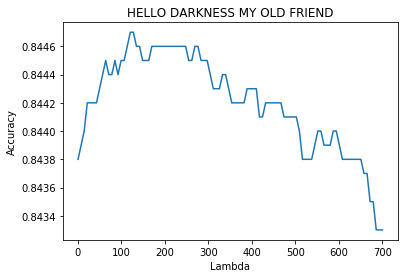

In [62]:
plt.plot(vector, acc_final)
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.title('HELLO DARKNESS MY OLD FRIEND')
plt.show()

In [66]:
import pandas as pd
w = np.linalg.inv(xtx+128*np.identity(len(xtx))) @ X.transpose() @ y
pd.DataFrame(w).to_csv('felipeCoelhoSilva.csv', index=False, sep=',', header = False)